In [1]:
import numpy as np, pandas as pd
from glob import glob
from astropy.table import Table
from matplotlib import pyplot as plt, colors as colors, colorbar as cbar
from astroquery.simbad import Simbad
import astropy.coordinates as coord
import astropy.units as u
from WISE_tools import *

%matplotlib inline

In [2]:
good = pd.read_csv('../data/bright_sample/massive.csv.gz')
len(good)

6484

In [3]:
lightcurve_directory = '../data/WISE_lcs/'
source_names = parse_source_names(lightcurve_directory)
print(source_names[0],len(source_names))

J000041.86+554320.8 6484


/Volumes/shoobert/Research/UW/GaiaSprintMassive/WISE/code/WISE_tools.py:79: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat(dfs)


96 4302.000004188002 45.28421057040002 0.1104999999999996 4.782183058834947


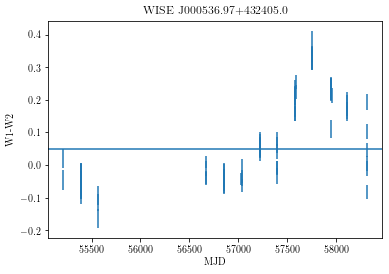

In [4]:
#An illustrative example
lc = get_lightcurve(source_names[4],lightcurve_directory)
N = len(lc)
chi2 = np.sum(((lc['w1w2'].values - np.median(lc['w1w2'].values))**2.0)/(lc['w1w2err'].values**2.0))
redchi2 = chi2/(N-1.0)
MAD = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values)))
EWM = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values))/lc['w1w2err'].values)
plt.errorbar(lc['mjd'],lc['w1w2'],yerr=lc['w1w2err'],ls='')
plt.axhline(y=np.median(lc['w1w2']))
plt.xlabel('MJD')
plt.ylabel('W1-W2')
plt.title('WISE '+source_names[4])
print(N,chi2,redchi2,MAD,EWM)

In [5]:
#```python
Ns = []
w1_chi2s = []
w1_chi2reds = []
w1_MADs = []
w1_EWMs = []
w2_chi2s = []
w2_chi2reds = []
w2_MADs = []
w2_EWMs = []
color_chi2s = []
color_chi2reds = []
color_MADs = []
color_EWMs = []
for i,name in enumerate(source_names):
    lc = get_lightcurve(name,lightcurve_directory)
    full_lc = get_lightcurve(name,lightcurve_directory,clean=False)
    N_full = len(full_lc)
    if N_full == 0:
        print('WISE '+name)
    N = len(lc)
    if N in [0,1]:
        w1_chi2 = 0
        w1_chi2red = 0
        w1_MAD = 0
        w1_EWM = 0
        w2_chi2 = 0
        w2_chi2red = 0
        w2_MAD = 0
        w2_EWM = 0
        color_chi2 = 0
        color_chi2red = 0
        color_MAD = 0
        color_EWM = 0
    else:
        w1_chi2 = np.sum(((lc['w1mpro'].values - np.median(lc['w1mpro'].values))/lc['w1sigmpro'].values)**2.0)
        w1_chi2red = w1_chi2/(N-1.0)
        w1_MAD = np.median(np.abs(lc['w1mpro'].values-np.median(lc['w1mpro'].values)))
        w1_EWM = np.median(np.abs(lc['w1mpro'].values-np.median(lc['w1mpro'].values))/lc['w1sigmpro'].values)
        w2_chi2 = np.sum(((lc['w2mpro'].values - np.median(lc['w2mpro'].values))/lc['w2sigmpro'].values)**2.0)
        w2_chi2red = w2_chi2/(N-1.0)
        w2_MAD = np.median(np.abs(lc['w2mpro'].values-np.median(lc['w2mpro'].values)))
        w2_EWM = np.median(np.abs(lc['w2mpro'].values-np.median(lc['w2mpro'].values))/lc['w2sigmpro'].values)
        color_chi2 = np.sum(((lc['w1w2'].values - np.median(lc['w1w2'].values))/lc['w1w2err'].values)**2.0)
        color_chi2red = color_chi2/(N-1.0)
        color_MAD = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values)))
        color_EWM = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values))/lc['w1w2err'].values)
    Ns.append(N)
    w1_chi2s.append(w1_chi2)
    w1_chi2reds.append(w1_chi2red)
    w1_MADs.append(w1_MAD)
    w1_EWMs.append(w1_EWM)
    w2_chi2s.append(w2_chi2)
    w2_chi2reds.append(w2_chi2red)
    w2_MADs.append(w2_MAD)
    w2_EWMs.append(w2_EWM)
    color_chi2s.append(color_chi2)
    color_chi2reds.append(color_chi2red)
    color_MADs.append(color_MAD)
    color_EWMs.append(color_EWM)
    if i%100 == 0:
        print(i)
        
variability_df = pd.DataFrame({'WISE_Designation':source_names,'N_obs':Ns,'W1chi2':w1_chi2s,
                              'W1chi2red':w1_chi2reds,'W1_MAD':w1_MADs,'W1_EWM':w1_EWMs,
                               'W2chi2':w2_chi2s,'W2chi2red':w2_chi2reds,'W2_MAD':w2_MADs,
                               'W2_EWM':w2_EWMs,'W1-W2chi2':color_chi2s,
                               'W1-W2chi2red':color_chi2reds,'W1-W2_MAD':color_MADs,
                               r'W1-W2_EWM':color_EWMs})
variability_df.to_csv('first_order_statistics.csv')

#NOTE: TWO STARS DIDN'T HAVE LIGHTCURVES, AND STILL DON'T: WISE J050128.62-701120.2
#WHICH ISN'T A REAL OBJECT AS FAR AS I CAN TELL (nearest SIMBAD source is 8" away)
#AND WISE J074911.48-102000.2 = HD 63554 WHICH JUST DOESN'T HAVE ANYTHING ON IT
#```

/Volumes/shoobert/Research/UW/GaiaSprintMassive/WISE/code/WISE_tools.py:79: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat(dfs)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
WISE J050128.62-701120.2
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500


/Users/carina/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


4600
4700
4800
4900
5000
WISE J074911.48-102000.2
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400


In [6]:
variability_df = pd.read_csv('first_order_statistics.csv')

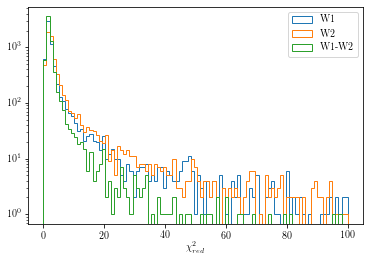

In [7]:
plt.hist(variability_df.dropna()['W1chi2red'],bins=np.linspace(0,100,100),histtype='step',label='W1')
plt.hist(variability_df.dropna()['W2chi2red'],bins=np.linspace(0,100,100),histtype='step',label='W2')
plt.hist(variability_df.dropna()['W1-W2chi2red'],bins=np.linspace(0,100,100),histtype='step',label='W1-W2')
plt.yscale('log')
plt.xlabel(r'$\chi^2_{red}$')
plt.legend()

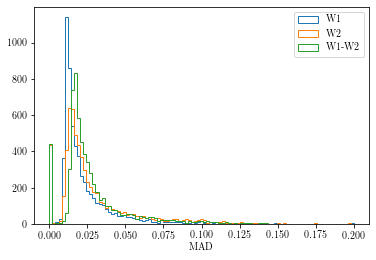

In [8]:
plt.hist(variability_df.dropna()['W1_MAD'],bins=np.linspace(0,0.2,100),histtype='step',label='W1')
plt.hist(variability_df.dropna()['W2_MAD'],bins=np.linspace(0,0.2,100),histtype='step',label='W2')
plt.hist(variability_df.dropna()['W1-W2_MAD'],bins=np.linspace(0,0.2,100),histtype='step',label='W1-W2')
plt.xlabel(r'MAD')
plt.legend()

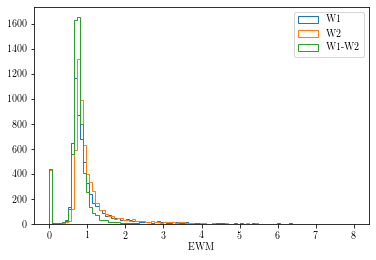

In [9]:
plt.hist(variability_df.dropna()['W1_EWM'],bins=np.linspace(0,8,100),histtype='step',label='W1')
plt.hist(variability_df.dropna()['W2_EWM'],bins=np.linspace(0,8,100),histtype='step',label='W2')
plt.hist(variability_df.dropna()['W1-W2_EWM'],bins=np.linspace(0,8,100),histtype='step',label='W1-W2')
plt.xlabel(r'EWM')
plt.legend()

Text(0, 0.5, '$\\chi^2_{red,W2}$')

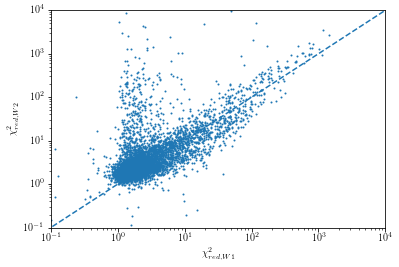

In [10]:
plt.plot([0,10000],[0,10000],ls='--')
plt.scatter(variability_df['W1chi2red'],variability_df['W2chi2red'],s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,10000)
plt.ylim(1e-1,10000)
plt.xlabel(r'$\chi^2_{red,W1}$')
plt.ylabel(r'$\chi^2_{red,W2}$')

Text(0, 0.5, 'EWM$_{\\rm W2}$')

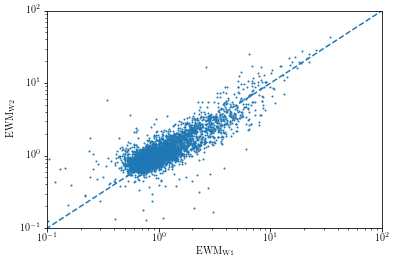

In [14]:
plt.plot([0,100],[0,100],ls='--')
plt.scatter(variability_df['W1_EWM'],variability_df['W2_EWM'],s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,100)
plt.ylim(1e-1,100)
plt.xlabel(r'EWM$_{\rm W1}$')
plt.ylabel(r'EWM$_{\rm W2}$')

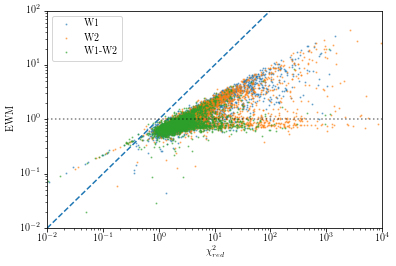

In [15]:
plt.plot([0,10000],[0,10000],ls='--')
plt.scatter(variability_df['W1chi2red'],variability_df['W1_EWM'],s=1,label='W1',alpha=0.5)
plt.scatter(variability_df['W2chi2red'],variability_df['W2_EWM'],s=1,label='W2',alpha=0.5)
plt.scatter(variability_df['W1-W2chi2red'],variability_df['W1-W2_EWM'],s=1,label='W1-W2',alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2,10000)
plt.ylim(1e-2,100)
plt.xlabel(r'$\chi^2_{red}$')
plt.ylabel(r'EWM')
plt.axhline(y=1,c='k',ls=':',alpha=0.5)
plt.legend()

In [16]:
classification_df = pd.read_csv('classifications.csv')
joined = good.merge(classification_df,on='source_id')
joined = joined.merge(variability_df,left_on='designation',right_on='WISE_Designation')

In [17]:
joined.columns

Index(['BP-RP', 'Galaxy', 'M_G', 'M_W1', 'W1-W2', 'W2-W3', 'W3-W4', 'a_g_val',
       'allwise_oid', 'dec', 'designation', 'original_ext_source_id',
       'parallax', 'parallax_error', 'phot_bp_mean_mag', 'phot_g_mean_mag',
       'phot_rp_mean_mag', 'r_est', 'r_hi', 'r_len', 'r_lo', 'ra', 'source_id',
       'w1mpro', 'w1mpro_error', 'w2mpro', 'w2mpro_error', 'w3mpro',
       'w3mpro_error', 'w4mpro', 'w4mpro_error', 'CommonName_x', 'MKType',
       'SimbadOType', 'SpT', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag',
       'e_Kmag', 'G-J', 'J-H', 'H-K', 'K-W1', 'J-W1', 'Unnamed: 0_x',
       'CommonName_y', 'Class', 'IsBinary', 'Unnamed: 0_y', 'WISE_Designation',
       'N_obs', 'W1chi2', 'W1chi2red', 'W1_MAD', 'W1_EWM', 'W2chi2',
       'W2chi2red', 'W2_MAD', 'W2_EWM', 'W1-W2chi2', 'W1-W2chi2red',
       'W1-W2_MAD', 'W1-W2_EWM'],
      dtype='object')

In [18]:
def cdf(array, norm=True):
    """
    Calculates the cumulative density function of a given array. Default behavior is to
    normalize the CDF for easy comparison between arrays of different sizes
    
    Parameters
    ----------
    array : array-like
        Array to calculate CDF of
        
    norm : bool
        Whether to normalize by the size of array. Default True.
    
    Returns
    -------
    vals : array-like
        Abcissa of density
    density : array-like
        Values of CDF
    
    """
    
    vals = np.sort(array[~np.isnan(array)])
    
    density = np.array([i+1 for i in range(len(vals))])
    
    if norm:
        density = density/len(vals)
        
    mean_dif = np.mean(np.diff(vals))
    
    vals = np.insert(vals, 0, np.min([0,vals[0]-mean_dif]))
    density = np.insert(density, 0, 0)
        
    return vals, density

Text(0, 0.5, 'CDF')

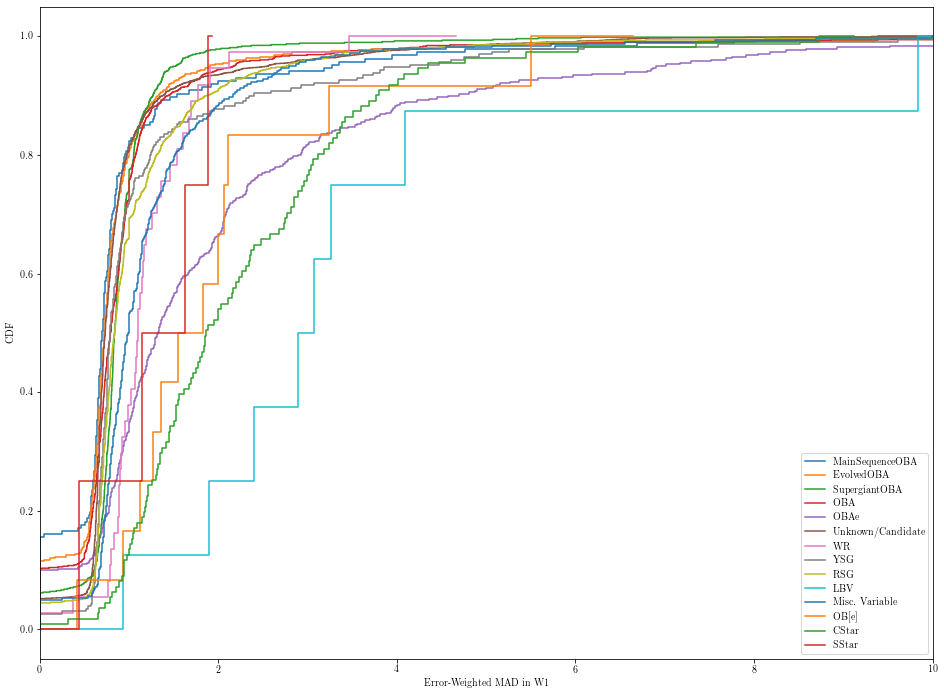

In [19]:
fig = plt.figure(figsize=(16,12))
for i,cl in enumerate(joined['Class'].unique()):
    vals, density = cdf(joined['W1_EWM'][joined['Class']==cl].values)
    plt.step(vals,density,where='mid',label=cl)
plt.legend()
plt.xlim(0,10)
plt.xlabel('Error-Weighted MAD in W1')
plt.ylabel('CDF')

Text(0, 0.5, 'CDF')

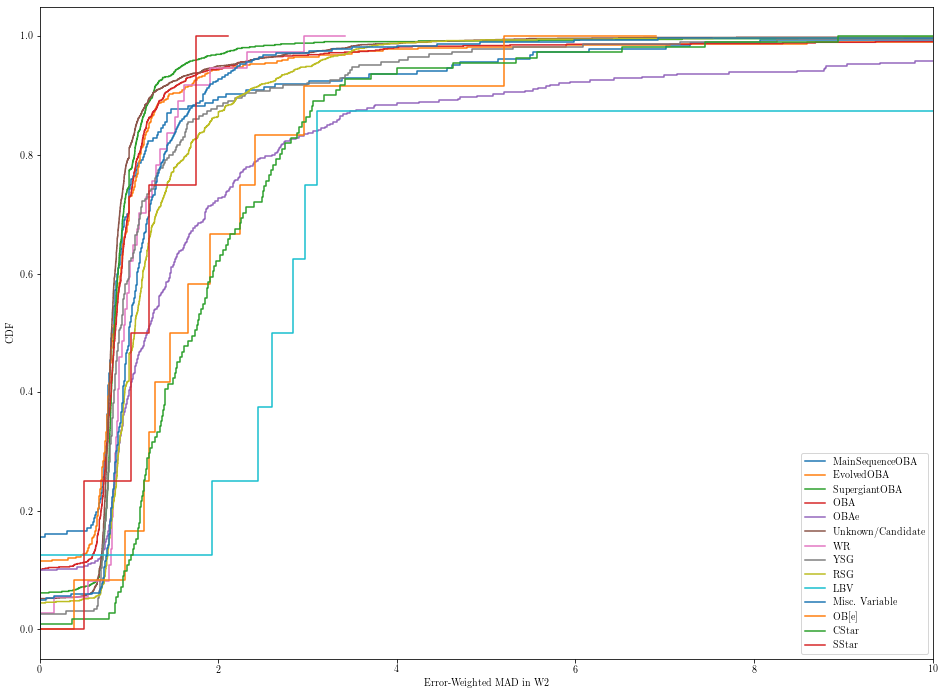

In [21]:
fig = plt.figure(figsize=(16,12))
for i,cl in enumerate(joined['Class'].unique()):
    vals, density = cdf(joined['W2_EWM'][joined['Class']==cl].values)
    plt.step(vals,density,where='mid',label=cl)
plt.legend()
plt.xlim(0,10)
plt.xlabel('Error-Weighted MAD in W2')
plt.ylabel('CDF')

Text(0, 0.5, 'CDF')

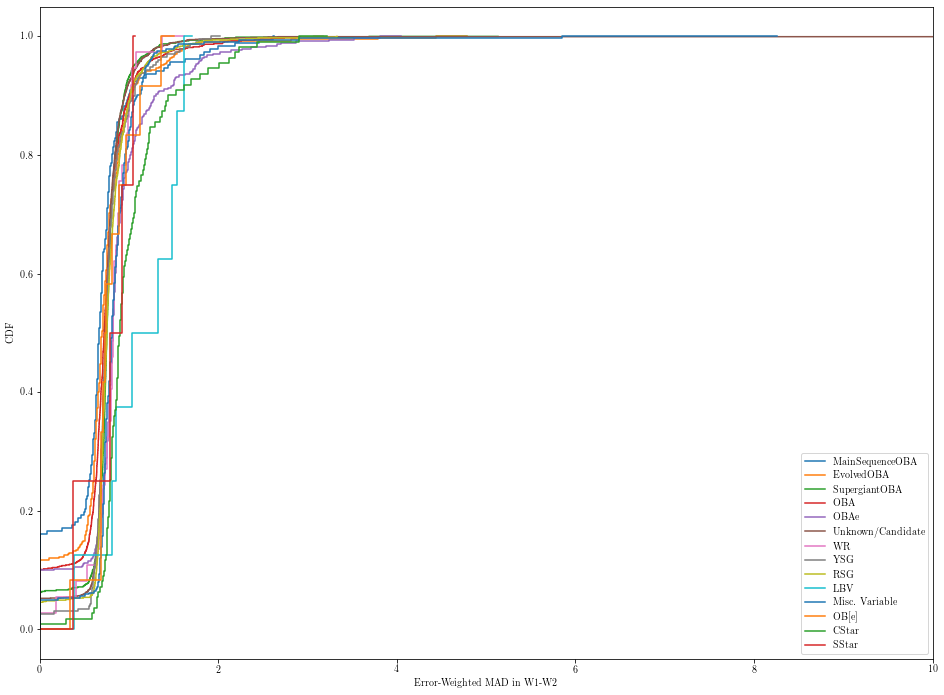

In [22]:
fig = plt.figure(figsize=(16,12))
for i,cl in enumerate(joined['Class'].unique()):
    vals, density = cdf(joined['W1-W2_EWM'][joined['Class']==cl].values)
    plt.step(vals,density,where='mid',label=cl)
plt.legend()
plt.xlim(0,10)
plt.xlabel('Error-Weighted MAD in W1-W2')
plt.ylabel('CDF')

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

training_indices = [c not in np.array(['Binary','Misc. Variable','OBA','Unknown/Candidate']) 
 for c in joined['Class']]
training_data = joined[training_indices].fillna(value=-999)
#training_data = training_data[training_data['W1_EWM']>0.5]
X = training_data[['G-J','J-H','H-K','K-W1','W1-W2','W2-W3','W3-W4','M_G','M_W1','W1chi2red',
                  'W2chi2red','W1-W2chi2red','W1_EWM','W2_EWM','W1-W2_EWM']]
y = training_data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=np.random.randint(1))

params = {'max_depth': np.arange(2,15,1),'max_features': ['sqrt','log2',None]}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=4)
grid.fit(X_train, y_train)
    
tree = grid.best_estimator_
#tree = DecisionTreeRegressor(max_depth=5)
max_depth = tree.max_depth
max_features = tree.max_features
print('Decision Tree with max_depth set to :')
print(max_depth)
print('and max_features set to :')
print(max_features)
tree.fit(X,y)
y_check_DT = tree.predict(X_test)

Decision Tree with max_depth set to :
4
and max_features set to :
None
